In [9]:
#from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import csv
import pandas as pd
from itertools import product

def read_metrics(filename, seed, row_filter):
    data = pd.read_csv(filename, skiprows=row_filter,header=0, index_col='step')
    return data.dropna(axis=1)

val1 = read_metrics(
    '/work/AI4GEO/users/fournip/outputs/sup_semcity/2023-10-17_120553/0/metrics.csv', 
    seed=1, row_filter=lambda x: x%3!=0
)
val2 = read_metrics(
    '/work/AI4GEO/users/fournip/outputs/sup_semcity/2023-10-17_120553/2/metrics.csv', 
    seed=2, row_filter=lambda x: x%3!=0
)
seeds = [1,2]
data = pd.concat([val1, val2], axis=1, keys=seeds).fillna(0)
#metrics = ['cross_entropy/val', 'accuracy/val']
#for m in metrics:
#    data['mean',m] = data[[(i,m) for i in seeds]].mean(axis=1)
data

1                                                               \
      epoch cross_entropy/val accuracy/val   iou/val   ece/val   mce/val   
step                                                                       
249       0          1.437455     0.401579  0.116670  0.070921  0.195300   
499       1          1.359067     0.464516  0.271734  0.110447  0.280816   
749       2          0.973226     0.612795  0.407390  0.049627  0.114914   
999       3          1.184440     0.545500  0.337832  0.170907  0.263103   
1249      4          0.841755     0.672106  0.484164  0.020216  0.049034   
...     ...               ...          ...       ...       ...       ...   
48999   195          0.715406     0.746188  0.563147  0.063781  0.143985   
49249   196          0.703958     0.749150  0.572530  0.057480  0.142587   
49499   197          0.721911     0.747512  0.566047  0.063134  0.132949   
49749   198          0.654220     0.762183  0.578355  0.045342  0.110066   
49999   199          0.681666     0.754626  0.575768  0.053361  0.129094   

          2                                                               
      epoch cross_entropy/val accuracy/val   iou/val   ece/val   mce/val  
step                                                                      
249       0          1.920402     0.254280  0.057301  0.294698  0.376138  
499       1          1.744053     0.269338  0.085426  0.323221  0.410763  
749       2          1.102165     0.555361  0.392685  0.082254  0.175426  
999       3          0.949864     0.627064  0.419295  0.028256  0.064092  
1249      4          0.971103     0.606674  0.298791  0.030323  0.054508  
...     ...               ...          ...       ...       ...       ...  
48999   195          0.699521     0.742371  0.542715  0.059008  0.099395  
49249   196          0.665560     0.750083  0.536410  0.050374  0.086939  
49499   197          0.702066     0.743161  0.521550  0.060433  0.098616  
49749   198          0.659264     0.754986  0.545383  0.048162  0.083106  
49999   199          0.643928     0.758119  0.559153  0.036612  0.063693  

[200 rows x 12 columns]

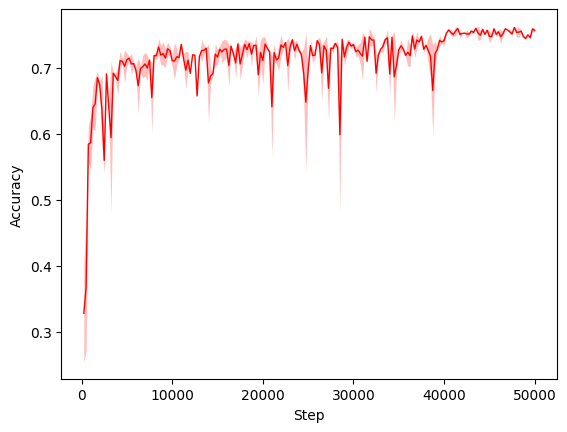

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
metric = 'accuracy/val'
ax1 = fig.add_subplot(111)
ax1.set_xlabel("Step")
ax1.set_ylabel("Accuracy")
ax1.fill_between(
    data.index,
    data[[(i,metric) for i in seeds]].min(axis=1),
    data[[(i,metric) for i in seeds]].max(axis=1),
    alpha=0.25,
    linewidth=0,
    color='red'
)
ax1.plot(
    data.index, 
    data[[(i,metric) for i in seeds]].mean(axis=1),
    linewidth=1, 
    linestyle='solid', 
    color='red',
    label='Validation accuracy'
)
